# Imports

In [53]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectPercentile, mutual_info_regression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, OneHotEncoder, RobustScaler
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
from clusteval import clusteval


# Testing

In [ ]:
merged_crime_df = pd.read_csv('/home/mih_sud/code/willbanny//Location-Analysis/raw_data/Total_Crime_Data_2023_04.csv')

In [8]:
merged

In [ ]:
def create_preproc_numerical():
    return make_pipeline(
        KNNImputer(),
        MinMaxScaler()
    )

def create_preproc_nominal():
    return make_pipeline(
        SimpleImputer(strategy="most_frequent"),
        OneHotEncoder(handle_unknown="ignore")
    )

def create_preproc(X, percentile = 75):
    """Create an (unfitted) sklearn preprocessing pipeline well suited for the Houses Kaggle Competition

    Args:
        X (pandas.DataFrame): Feature matrix
        percentile (float): Percentage of feature to keep after one hot encoding

    Returns:
        sklearn.pipeline.Pipeline: un-fitted preprocessor
    """
    preproc_ordinal, feat_ordinal = create_preproc_ordinal()
    
    preproc_numerical = create_preproc_numerical()
    feat_numerical = sorted(X.select_dtypes(
        include=["int64", "float64"]).columns)
    
    preproc_nominal = create_preproc_nominal()
    feat_nominal = sorted(
        list(set(X.columns) - set(feat_numerical) - set(feat_ordinal)))
    
    feature_transformer = ColumnTransformer(
        [
        ("numerical_encoder", preproc_numerical, feat_numerical),
        ("ordinal_encoder", preproc_ordinal, feat_ordinal),
        ("nominal_encoder", preproc_nominal, feat_nominal)
        ],
        remainder="drop")

    feature_selector = SelectPercentile(
        mutual_info_regression,
        percentile=percentile,  # keep the xx% most important features
    )

    preproc = make_pipeline(
        feature_transformer,
        feature_selector
    )
    return preproc


# Feature Selection

In [153]:
leicester_golden_df = pd.read_csv("/home/mih_sud/code/willbanny/Location-Analysis/raw_data/golden_df_trial_bigQuery.csv")

In [154]:
leicester_golden_df

,Unnamed: 0,District_x,Description_x,GridName_x,lng,lat,hospital_500,train_station_500,bus_station_500,park_500,...,Robbery_1500,Shoplifting_1500,Drugs_1500,Theft from the person_1500,Possession of weapons_1500,Local_Authority_District_code__2019_,Local_Authority_District_name__2019_,Index_of_Multiple_Deprivation__IMD__Score,longitude,latitude
0,0,City of Leicester (B),Unitary Authority,Grid2_0,-1.178881,52.687005,0,0,0,0,...,0,0,0,0,0,E06000016,Leicester,12.917,-1.157259,52.678305
1,1,City of Leicester (B),Unitary Authority,Grid3_0,-1.164038,52.687005,0,0,0,0,...,0,0,0,0,0,E06000016,Leicester,12.917,-1.157259,52.678305
2,2,City of Leicester (B),Unitary Authority,Grid5_0,-1.134352,52.687005,0,0,0,0,...,0,0,0,0,0,E06000016,Leicester,12.917,-1.157259,52.678305
3,3,City of Leicester (B),Unitary Authority,Grid4_0,-1.149195,52.687005,0,0,0,0,...,0,0,0,0,0,E06000016,Leicester,12.917,-1.157259,52.678305
4,4,City of Leicester (B),Unitary Authority,Grid2_1,-1.178888,52.678007,0,0,0,0,...,0,0,0,0,0,E06000016,Leicester,27.035,-1.171282,52.671605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,City of Leicester (B),Unitary Authority,Grid6_11,-1.119727,52.588025,0,0,0,0,...,0,1,0,0,0,E06000016,Leicester,55.718,-1.131030,52.595230
96,96,City of Leicester (B),Unitary Authority,Grid3_12,-1.164166,52.579026,0,0,0,0,...,0,0,0,0,0,E06000016,Leicester,51.943,-1.154786,52.583273
97,97,City of Leicester (B),Unitary Authority,Grid4_12,-1.149359,52.579026,0,0,0,0,...,0,2,1,0,0,E06000016,Leicester,51.943,-1.154786,52.583273
98,98,City of Leicester (B),Unitary Authority,Grid2_11,-1.178964,52.588025,0,0,0,0,...,0,0,0,0,0,E06000016,Leicester,34.751,-1.162827,52.594066


In [33]:
leicester_golden_df[["District_y", "Description_y", "GridName_y"]]

,District_y,Description_y,GridName_y
0,City of Leicester (B),Unitary Authority,Grid2_0
1,City of Leicester (B),Unitary Authority,Grid3_0
2,City of Leicester (B),Unitary Authority,Grid5_0
3,City of Leicester (B),Unitary Authority,Grid4_0
4,City of Leicester (B),Unitary Authority,Grid2_1
...,...,...,...
95,City of Leicester (B),Unitary Authority,Grid6_11
96,City of Leicester (B),Unitary Authority,Grid3_12
97,City of Leicester (B),Unitary Authority,Grid4_12
98,City of Leicester (B),Unitary Authority,Grid2_11


In [151]:
leicester_golden_df.columns

Index(['District_x', 'Description_x', 'GridName_x', 'lng', 'lat',
       'hospital_500', 'train_station_500', 'bus_station_500', 'park_500',
       'place_of_worship_500',
       ...
       'Outdoors_Sub_domain_Score',
       'Outdoors_Sub_domain_Rank__where_1_is_most_deprived_',
       'Outdoors_Sub_domain_Decile__where_1_is_most_deprived_10__of_LSOAs_',
       'Total_population__mid_2015__excluding_prisoners_',
       'Dependent_Children_aged_0_15__mid_2015__excluding_prisoners_',
       'Population_aged_16_59__mid_2015__excluding_prisoners_',
       'Older_population_aged_60_and_over__mid_2015__excluding_prisoners_',
       'Working_age_population_18_59_64__for_use_with_Employment_Deprivation_Domain__excluding_prisoners__',
       'longitude', 'latitude'],
      dtype='object', length=124)

In [34]:
to_scale_df = leicester_golden_df.drop(columns = ["Unnamed: 0", "District_x", "Description_x", "GridName_x", "lng", "lat", "District_y", "Description_y", "GridName_y", "Local_Authority_District_code__2019_", "Local_Authority_District_name__2019_", "longitude", "latitude" ])

In [82]:
to_scale_df.shape

(100, 58)

In [146]:
pd.DataFrame(to_scale_df).corr().loc["park_500"]

hospital_500                                 0.231354
train_station_500                           -0.031187
bus_station_500                              0.455665
park_500                                     1.000000
place_of_worship_500                         0.446132
hospital_1000                                0.675868
train_station_1000                           0.012801
bus_station_1000                             0.507799
park_1000                                    0.696535
place_of_worship_1000                        0.471978
hospital_1500                                0.395950
train_station_1500                           0.508867
bus_station_1500                             0.348095
park_1500                                    0.624700
place_of_worship_1500                        0.465501
Anti-social behaviour_500                    0.382004
Other theft_500                              0.558131
Public order_500                             0.544262
Vehicle crime_500           

In [137]:
 df['quantity] = df['quantity'].apply(lambda x: x*-1)negative_df["Criminal damage and arson_500"]

TypeError: 'method' object is not subscriptable

In [36]:
city_features = to_scale_df.columns

# Min Max Scaling Pipe

## Scaling

In [194]:
mm_scaler = MinMaxScaler()

In [195]:
mm_scaler.fit(to_scale_df)

MinMaxScaler()

In [196]:
mm_scaled_df = pd.DataFrame(mm_scaler.transform(to_scale_df), columns=city_features)

## Scaling Engineering 

In [197]:
mm_scaled_df.columns

Index(['hospital_500', 'train_station_500', 'bus_station_500', 'park_500',
       'place_of_worship_500', 'hospital_1000', 'train_station_1000',
       'bus_station_1000', 'park_1000', 'place_of_worship_1000',
       'hospital_1500', 'train_station_1500', 'bus_station_1500', 'park_1500',
       'place_of_worship_1500', 'Anti-social behaviour_500', 'Other theft_500',
       'Public order_500', 'Vehicle crime_500',
       'Violence and sexual offences_500', 'Burglary_500',
       'Criminal damage and arson_500', 'Other crime_500', 'Bicycle theft_500',
       'Robbery_500', 'Shoplifting_500', 'Drugs_500',
       'Theft from the person_500', 'Possession of weapons_500',
       'Anti-social behaviour_1000', 'Other theft_1000', 'Public order_1000',
       'Vehicle crime_1000', 'Violence and sexual offences_1000',
       'Burglary_1000', 'Criminal damage and arson_1000', 'Other crime_1000',
       'Bicycle theft_1000', 'Robbery_1000', 'Shoplifting_1000', 'Drugs_1000',
       'Theft from the p

In [200]:
mm_scaled_df[['Anti-social behaviour_500', 'Other theft_500',
       'Public order_500', 'Vehicle crime_500',
       'Violence and sexual offences_500', 'Burglary_500',
       'Criminal damage and arson_500', 'Other crime_500', 'Bicycle theft_500',
       'Robbery_500', 'Shoplifting_500', 'Drugs_500',
       'Theft from the person_500', 'Possession of weapons_500',
       'Anti-social behaviour_1000', 'Other theft_1000', 'Public order_1000',
       'Vehicle crime_1000', 'Violence and sexual offences_1000',
       'Burglary_1000', 'Criminal damage and arson_1000', 'Other crime_1000',
       'Bicycle theft_1000', 'Robbery_1000', 'Shoplifting_1000', 'Drugs_1000',
       'Theft from the person_1000', 'Possession of weapons_1000',
       'Anti-social behaviour_1500', 'Other theft_1500', 'Public order_1500',
       'Vehicle crime_1500', 'Violence and sexual offences_1500',
       'Burglary_1500', 'Criminal damage and arson_1500', 'Other crime_1500',
       'Bicycle theft_1500', 'Robbery_1500', 'Shoplifting_1500', 'Drugs_1500',
       'Theft from the person_1500', 'Possession of weapons_1500']] = mm_scaled_df[['Anti-social behaviour_500', 'Other theft_500',
       'Public order_500', 'Vehicle crime_500',
       'Violence and sexual offences_500', 'Burglary_500',
       'Criminal damage and arson_500', 'Other crime_500', 'Bicycle theft_500',
       'Robbery_500', 'Shoplifting_500', 'Drugs_500',
       'Theft from the person_500', 'Possession of weapons_500',
       'Anti-social behaviour_1000', 'Other theft_1000', 'Public order_1000',
       'Vehicle crime_1000', 'Violence and sexual offences_1000',
       'Burglary_1000', 'Criminal damage and arson_1000', 'Other crime_1000',
       'Bicycle theft_1000', 'Robbery_1000', 'Shoplifting_1000', 'Drugs_1000',
       'Theft from the person_1000', 'Possession of weapons_1000',
       'Anti-social behaviour_1500', 'Other theft_1500', 'Public order_1500',
       'Vehicle crime_1500', 'Violence and sexual offences_1500',
       'Burglary_1500', 'Criminal damage and arson_1500', 'Other crime_1500',
       'Bicycle theft_1500', 'Robbery_1500', 'Shoplifting_1500', 'Drugs_1500',
       'Theft from the person_1500', 'Possession of weapons_1500']] *-1
mm_scaled_df

,hospital_500,train_station_500,bus_station_500,park_500,place_of_worship_500,hospital_1000,train_station_1000,bus_station_1000,park_1000,place_of_worship_1000,...,Burglary_1500,Criminal damage and arson_1500,Other crime_1500,Bicycle theft_1500,Robbery_1500,Shoplifting_1500,Drugs_1500,Theft from the person_1500,Possession of weapons_1500,Index_of_Multiple_Deprivation__IMD__Score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.119270
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.027778,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.119270
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.119270
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.027778,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.119270
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.083333,0.142857,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.330333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.333333,0.083333,0.142857,0.0,0.0,0.018182,0.000000,0.000000,0.0,0.759142
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.133333,0.027778,0.285714,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.702706
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.200000,0.111111,0.285714,0.0,0.0,0.036364,0.033333,0.000000,0.0,0.702706
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.445687


In [202]:
mm_scaled_df[['hospital_500', 'hospital_1000', 'hospital_1500']] = mm_scaled_df[['hospital_500', 'hospital_1000', 'hospital_1500']]*2

# Robust Scaling Pipe

## Scaling

In [227]:
r_scaler = RobustScaler()

In [228]:
r_scaler.fit(to_scale_df)

RobustScaler()

In [229]:
r_scaled_df = pd.DataFrame(r_scaler.transform(to_scale_df), columns=city_features)

## Scaling Engineering 

In [230]:
r_scaled_df[['Anti-social behaviour_500', 'Other theft_500',
       'Public order_500', 'Vehicle crime_500',
       'Violence and sexual offences_500', 'Burglary_500',
       'Criminal damage and arson_500', 'Other crime_500', 'Bicycle theft_500',
       'Robbery_500', 'Shoplifting_500', 'Drugs_500',
       'Theft from the person_500', 'Possession of weapons_500',
       'Anti-social behaviour_1000', 'Other theft_1000', 'Public order_1000',
       'Vehicle crime_1000', 'Violence and sexual offences_1000',
       'Burglary_1000', 'Criminal damage and arson_1000', 'Other crime_1000',
       'Bicycle theft_1000', 'Robbery_1000', 'Shoplifting_1000', 'Drugs_1000',
       'Theft from the person_1000', 'Possession of weapons_1000',
       'Anti-social behaviour_1500', 'Other theft_1500', 'Public order_1500',
       'Vehicle crime_1500', 'Violence and sexual offences_1500',
       'Burglary_1500', 'Criminal damage and arson_1500', 'Other crime_1500',
       'Bicycle theft_1500', 'Robbery_1500', 'Shoplifting_1500', 'Drugs_1500',
       'Theft from the person_1500', 'Possession of weapons_1500']] = mm_scaled_df[['Anti-social behaviour_500', 'Other theft_500',
       'Public order_500', 'Vehicle crime_500',
       'Violence and sexual offences_500', 'Burglary_500',
       'Criminal damage and arson_500', 'Other crime_500', 'Bicycle theft_500',
       'Robbery_500', 'Shoplifting_500', 'Drugs_500',
       'Theft from the person_500', 'Possession of weapons_500',
       'Anti-social behaviour_1000', 'Other theft_1000', 'Public order_1000',
       'Vehicle crime_1000', 'Violence and sexual offences_1000',
       'Burglary_1000', 'Criminal damage and arson_1000', 'Other crime_1000',
       'Bicycle theft_1000', 'Robbery_1000', 'Shoplifting_1000', 'Drugs_1000',
       'Theft from the person_1000', 'Possession of weapons_1000',
       'Anti-social behaviour_1500', 'Other theft_1500', 'Public order_1500',
       'Vehicle crime_1500', 'Violence and sexual offences_1500',
       'Burglary_1500', 'Criminal damage and arson_1500', 'Other crime_1500',
       'Bicycle theft_1500', 'Robbery_1500', 'Shoplifting_1500', 'Drugs_1500',
       'Theft from the person_1500', 'Possession of weapons_1500']] *-1
r_scaled_df

,hospital_500,train_station_500,bus_station_500,park_500,place_of_worship_500,hospital_1000,train_station_1000,bus_station_1000,park_1000,place_of_worship_1000,...,Burglary_1500,Criminal damage and arson_1500,Other crime_1500,Bicycle theft_1500,Robbery_1500,Shoplifting_1500,Drugs_1500,Theft from the person_1500,Possession of weapons_1500,Index_of_Multiple_Deprivation__IMD__Score
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000000,-0.000000,-0.000000,-0.0,-0.0,-0.000000,-0.000000,-0.000000,-0.0,-0.572723
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000000,-0.027778,-0.000000,-0.0,-0.0,-0.000000,-0.000000,-0.000000,-0.0,-0.572723
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000000,-0.000000,-0.000000,-0.0,-0.0,-0.000000,-0.000000,-0.000000,-0.0,-0.572723
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000000,-0.027778,-0.000000,-0.0,-0.0,-0.000000,-0.000000,-0.000000,-0.0,-0.572723
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000000,-0.083333,-0.142857,-0.0,-0.0,-0.000000,-0.000000,-0.000000,-0.0,-0.049597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.333333,-0.083333,-0.142857,-0.0,-0.0,-0.018182,-0.000000,-0.000000,-0.0,1.013219
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.133333,-0.027778,-0.285714,-0.0,-0.0,-0.000000,-0.000000,-0.000000,-0.0,0.873341
97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.200000,-0.111111,-0.285714,-0.0,-0.0,-0.036364,-0.033333,-0.000000,-0.0,0.873341
98,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000000,-0.000000,-0.000000,-0.0,-0.0,-0.000000,-0.000000,-0.000000,-0.0,0.236311


In [231]:
r_scaled_df[['hospital_500', 'hospital_1000', 'hospital_1500']] = r_scaled_df[['hospital_500', 'hospital_1000', 'hospital_1500']]*2

# PCA

## Min Max PCA

In [232]:
mm_pca = PCA()

pip install clusteval

In [233]:
mm_pca.fit(mm_scaled_df)

PCA()

In [234]:
W = mm_pca.components_

In [235]:
W = pd.DataFrame(W.T,
                 index=city_features,
                 columns=[f'PC{i}' for i in range(1, len(city_features) + 1)])

In [236]:
mm_proj = mm_pca.transform(mm_scaled_df)
mm_proj = pd.DataFrame(mm_proj, columns=[f'PC{i}' for i in range(1, len(city_features) + 1)])


<Axes: >

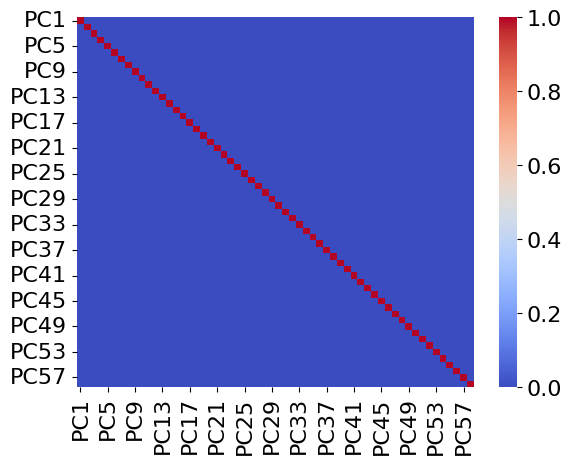

In [237]:
sns.heatmap(mm_proj.corr(), cmap='coolwarm')

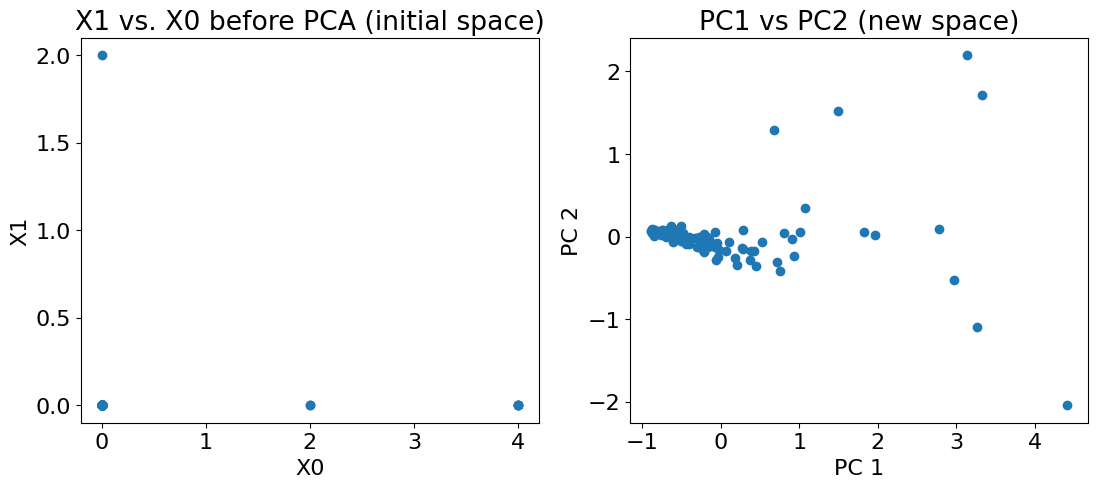

In [238]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.title('X1 vs. X0 before PCA (initial space)'); plt.xlabel('X0'); plt.ylabel('X1')
plt.scatter(to_scale_df.iloc[:,0], to_scale_df.iloc[:,1])

plt.subplot(1,2,2)
plt.title('PC1 vs PC2 (new space)'); plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.scatter(mm_proj.iloc[:,0], mm_proj.iloc[:,1]);

In [239]:
mm_pca.explained_variance_ratio_

array([4.68236321e-01, 8.23497053e-02, 6.84227475e-02, 5.64418759e-02,
       4.04900806e-02, 3.40474089e-02, 2.82348085e-02, 2.25787379e-02,
       1.99307937e-02, 1.92764303e-02, 1.65060091e-02, 1.52081389e-02,
       1.39996915e-02, 1.27648502e-02, 9.87260631e-03, 9.15727679e-03,
       8.31843768e-03, 7.88560935e-03, 7.09988743e-03, 6.56097171e-03,
       5.73138295e-03, 5.39738952e-03, 4.79203096e-03, 4.38249768e-03,
       3.94126903e-03, 3.51978976e-03, 3.00438398e-03, 2.81120450e-03,
       2.61531515e-03, 2.21106654e-03, 2.11809889e-03, 1.83786469e-03,
       1.49618924e-03, 1.27189830e-03, 1.10131112e-03, 9.14617427e-04,
       7.53273835e-04, 6.82906764e-04, 5.92749171e-04, 5.74477371e-04,
       4.70586738e-04, 4.06538551e-04, 3.43334340e-04, 2.91822610e-04,
       2.49364041e-04, 1.94432352e-04, 1.62260104e-04, 1.49511824e-04,
       1.37815273e-04, 1.14657424e-04, 8.77998961e-05, 6.49219557e-05,
       5.58167161e-05, 4.86302865e-05, 3.76014467e-05, 2.66987465e-05,
      

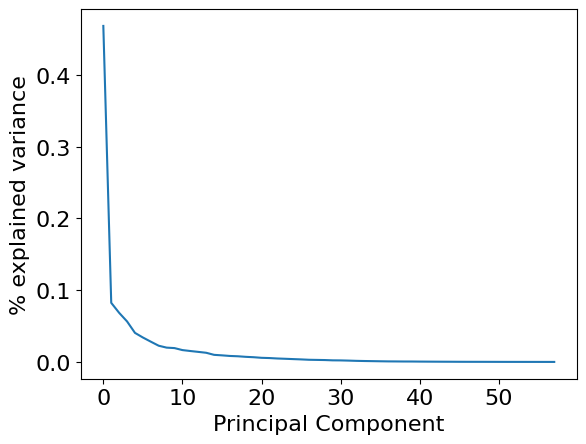

In [240]:
plt.plot(mm_pca.explained_variance_ratio_)
plt.xlabel('Principal Component'); plt.ylabel('% explained variance');

In [241]:
np.cumsum(mm_pca.explained_variance_ratio_)

array([0.46823632, 0.55058603, 0.61900877, 0.67545065, 0.71594073,
       0.74998814, 0.77822295, 0.80080169, 0.82073248, 0.84000891,
       0.85651492, 0.87172306, 0.88572275, 0.8984876 , 0.90836021,
       0.91751748, 0.92583592, 0.93372153, 0.94082142, 0.94738239,
       0.95311377, 0.95851116, 0.96330319, 0.96768569, 0.97162696,
       0.97514675, 0.97815113, 0.98096234, 0.98357765, 0.98578872,
       0.98790682, 0.98974468, 0.99124087, 0.99251277, 0.99361408,
       0.9945287 , 0.99528197, 0.99596488, 0.99655763, 0.99713211,
       0.99760269, 0.99800923, 0.99835257, 0.99864439, 0.99889375,
       0.99908818, 0.99925044, 0.99939996, 0.99953777, 0.99965243,
       0.99974023, 0.99980515, 0.99986097, 0.9999096 , 0.9999472 ,
       0.9999739 , 0.9999919 , 1.        ])

## Robust PCA

In [242]:
r_pca = PCA()


In [243]:
r_pca.fit(r_scaled_df)

W = r_pca.components_


W = pd.DataFrame(W.T,
                 index=city_features,
                 columns=[f'PC{i}' for i in range(1, len(city_features) + 1)])

In [244]:
r_proj = r_pca.transform(r_scaled_df)
r_proj = pd.DataFrame(r_proj, columns=[f'PC{i}' for i in range(1, len(city_features )+ 1)])

<Axes: >

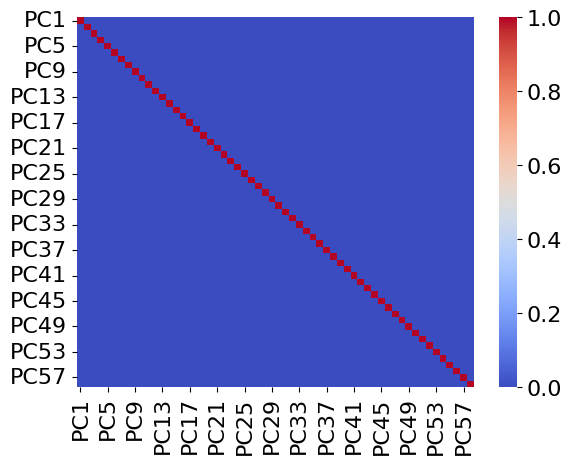

In [245]:
sns.heatmap(r_proj.corr(), cmap='coolwarm')

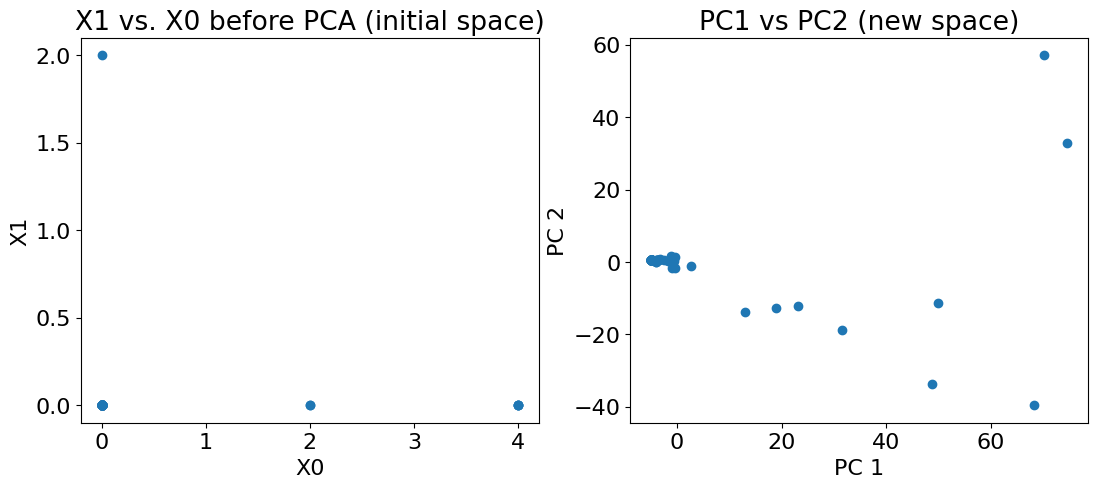

In [246]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.title('X1 vs. X0 before PCA (initial space)'); plt.xlabel('X0'); plt.ylabel('X1')
plt.scatter(to_scale_df.iloc[:,0], to_scale_df.iloc[:,1])

plt.subplot(1,2,2)
plt.title('PC1 vs PC2 (new space)'); plt.xlabel('PC 1'); plt.ylabel('PC 2')
plt.scatter(r_proj.iloc[:,0], r_proj.iloc[:,1]);

In [247]:
r_pca.explained_variance_ratio_

array([6.26128977e-01, 2.11171069e-01, 5.33092643e-02, 4.63053492e-02,
       2.18503485e-02, 1.76957153e-02, 9.28523194e-03, 5.49323317e-03,
       2.84604054e-03, 1.97404510e-03, 1.11648951e-03, 6.50904786e-04,
       3.90275598e-04, 3.50280427e-04, 2.10424178e-04, 1.74310864e-04,
       1.28221535e-04, 1.15554315e-04, 1.02871804e-04, 8.83773095e-05,
       7.41825302e-05, 7.16770100e-05, 6.62281648e-05, 4.90459888e-05,
       4.29502600e-05, 4.04007261e-05, 3.46272702e-05, 3.13530846e-05,
       2.99903129e-05, 2.62985017e-05, 2.07065084e-05, 1.71946937e-05,
       1.62643220e-05, 1.32707160e-05, 1.22799205e-05, 1.06679062e-05,
       9.52104652e-06, 8.02563300e-06, 6.76700749e-06, 5.03960622e-06,
       4.21678855e-06, 3.21420777e-06, 2.93133742e-06, 2.77380024e-06,
       2.27193197e-06, 1.96666955e-06, 1.83003475e-06, 1.51826884e-06,
       1.15514491e-06, 1.03153372e-06, 9.91911714e-07, 7.21635536e-07,
       4.92702200e-07, 4.30978738e-07, 3.00167833e-07, 2.80625689e-07,
      

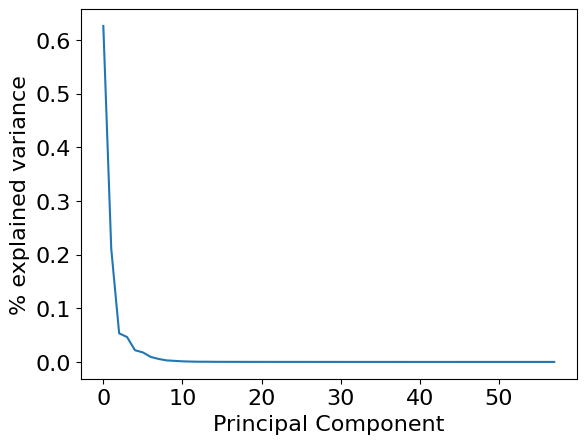

In [248]:
plt.plot(r_pca.explained_variance_ratio_)
plt.xlabel('Principal Component'); plt.ylabel('% explained variance');

In [249]:
np.cumsum(r_pca.explained_variance_ratio_)

array([0.62612898, 0.83730005, 0.89060931, 0.93691466, 0.95876501,
       0.97646072, 0.98574595, 0.99123919, 0.99408523, 0.99605927,
       0.99717576, 0.99782667, 0.99821694, 0.99856722, 0.99877765,
       0.99895196, 0.99908018, 0.99919573, 0.99929861, 0.99938698,
       0.99946117, 0.99953284, 0.99959907, 0.99964812, 0.99969107,
       0.99973147, 0.9997661 , 0.99979745, 0.99982744, 0.99985374,
       0.99987444, 0.99989164, 0.9999079 , 0.99992117, 0.99993345,
       0.99994412, 0.99995364, 0.99996167, 0.99996844, 0.99997348,
       0.99997769, 0.99998091, 0.99998384, 0.99998661, 0.99998888,
       0.99999085, 0.99999268, 0.9999942 , 0.99999535, 0.99999639,
       0.99999738, 0.9999981 , 0.99999859, 0.99999902, 0.99999932,
       0.9999996 , 0.99999982, 1.        ])

# ClustEval

## Min Max ClustEval

In [250]:
mm_ce = clusteval(cluster = 'kmeans')
mm_results = mm_ce.fit(mm_proj)

[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[kmeans], metric=[euclidean], linkage=[ward]
[clusteval] >INFO> Evaluate using silhouette.
[clusteval] >INFO:   0%|                                                                         | 0/23 [00:00<?, ?it/s]/home/mih_sud/.pyenv/versions/3.10.6/envs/Location-Analysis/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/mih_sud/.pyenv/versions/3.10.6/envs/Location-Analysis/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
[clusteval] >INFO:   9%|█████▋                                                           | 2/23 [00:00<00:01, 18.63it/s]/home/mih_sud/.pyenv/version

[clusteval] >INFO:  96%|█████████████████████████████████████████████████████████████▏  | 22/23 [00:02<00:00,  7.51it/s]/home/mih_sud/.pyenv/versions/3.10.6/envs/Location-Analysis/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
[clusteval] >INFO: 100%|████████████████████████████████████████████████████████████████| 23/23 [00:02<00:00,  9.54it/s]
[clusteval] >INFO> Optimal number clusters detected: [2].
[clusteval] >INFO> Fin.


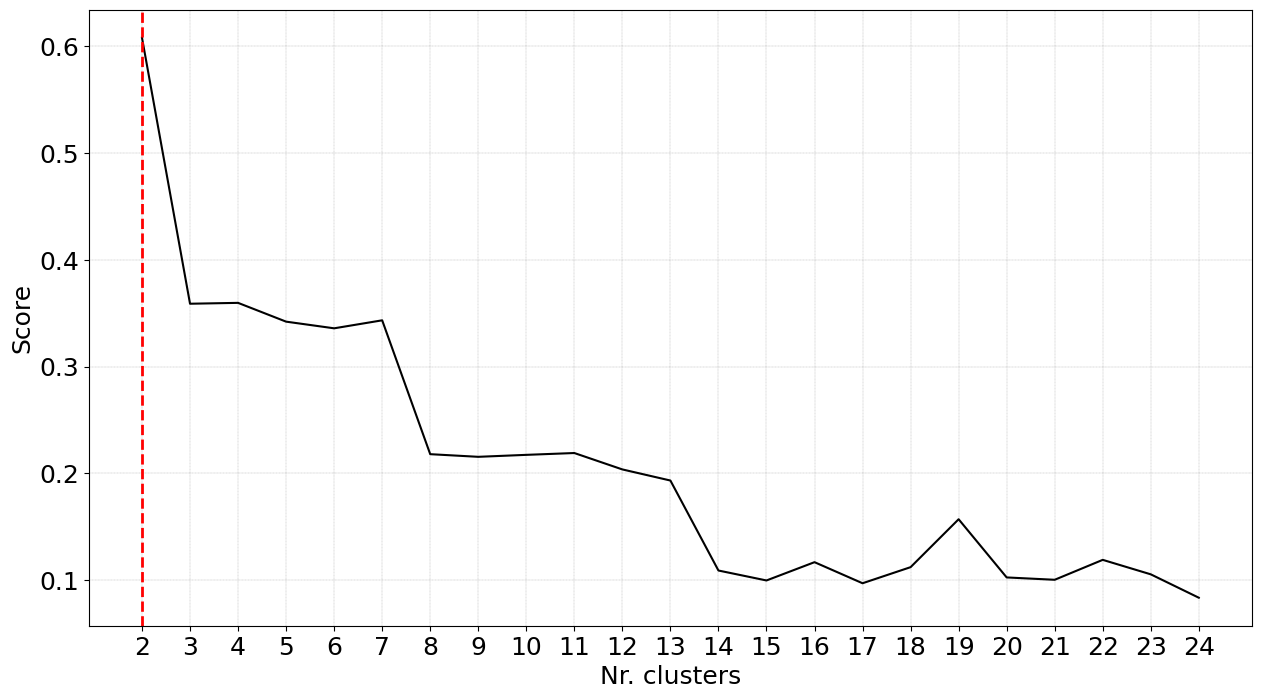

(<Figure size 1500x800 with 1 Axes>,
 <Axes: xlabel='Nr. clusters', ylabel='Score'>)

In [251]:
mm_ce.plot()

In [252]:
mm_results

{'evaluate': 'silhouette',
 'score':     cluster_threshold  clusters     score
 0                   2         2  0.608092
 1                   3         3  0.358953
 2                   4         4  0.359764
 3                   5         5  0.342168
 4                   6         6  0.335929
 5                   7         7  0.343414
 6                   8         8  0.218046
 7                   9         9  0.215571
 8                  10        10  0.217411
 9                  11        11  0.219125
 10                 12        12  0.203761
 11                 13        13  0.193362
 12                 14        14  0.109081
 13                 15        15  0.099766
 14                 16        16  0.116899
 15                 17        17  0.097155
 16                 18        18  0.112226
 17                 19        19  0.157107
 18                 20        20  0.102604
 19                 21        21  0.100407
 20                 22        22  0.119075
 21               

[clusteval] >INFO> Coordinates (x, y) are set based on the first two features.


[colourmap] >Add transparency to RGB colors (last column)
[scatterd]> Set alpha based on density because of the parameter: [opaque]


(<Figure size 2500x1500 with 1 Axes>, <Axes: xlabel='x-axis', ylabel='y-axis'>)

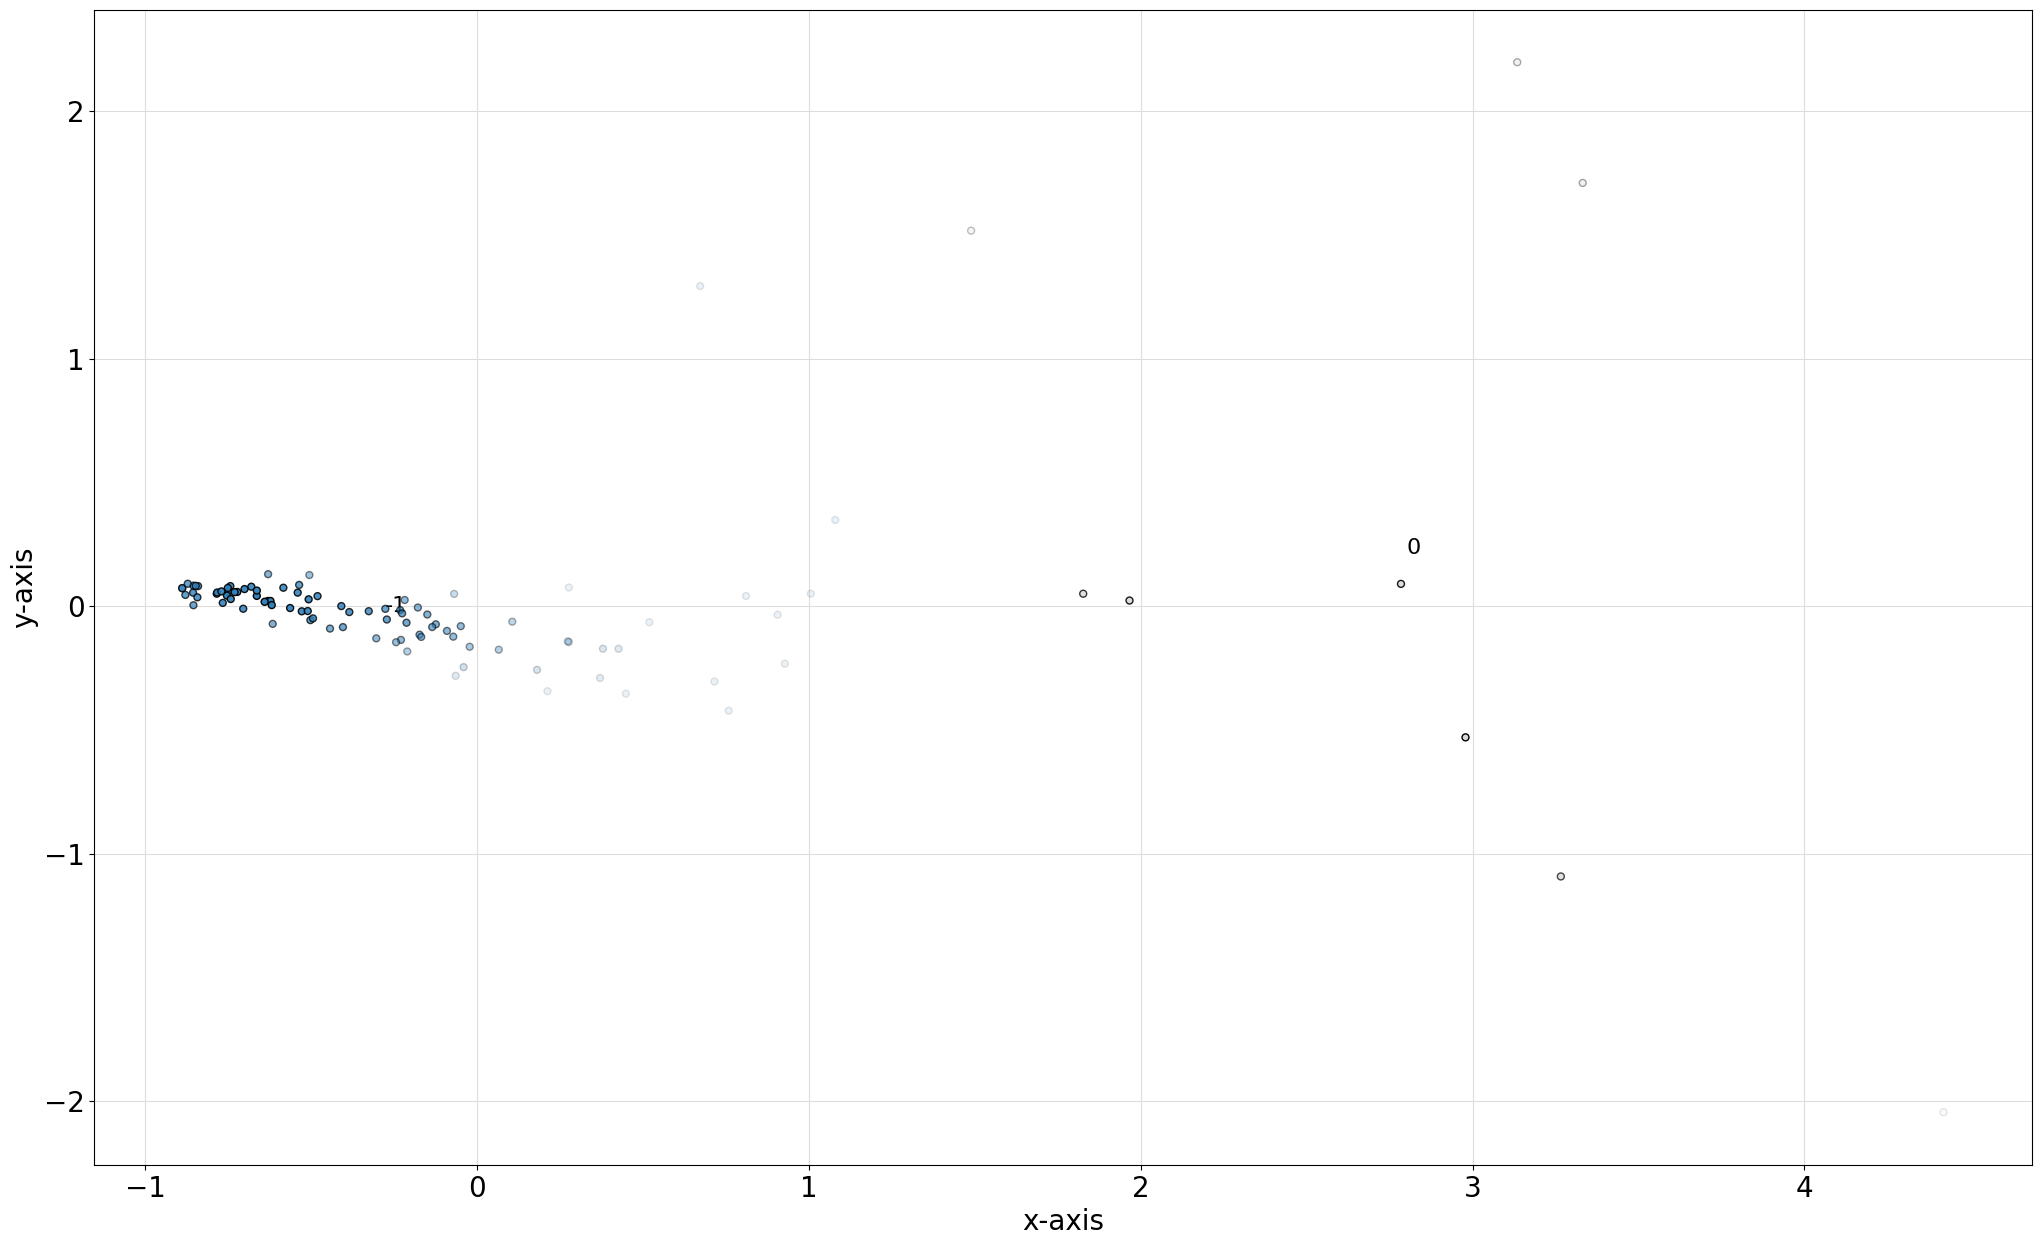

In [253]:
mm_ce.scatter(mm_proj)

## Robust ClustEval

In [254]:
r_ce = clusteval(cluster = 'kmeans')
r_results = r_ce.fit(r_proj)

[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[kmeans], metric=[euclidean], linkage=[ward]
[clusteval] >INFO> Evaluate using silhouette.
[clusteval] >INFO:   0%|                                                                         | 0/23 [00:00<?, ?it/s]/home/mih_sud/.pyenv/versions/3.10.6/envs/Location-Analysis/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/mih_sud/.pyenv/versions/3.10.6/envs/Location-Analysis/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/mih_sud/.pyenv/versions/3.10.6/envs/Location-Analysis/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default 

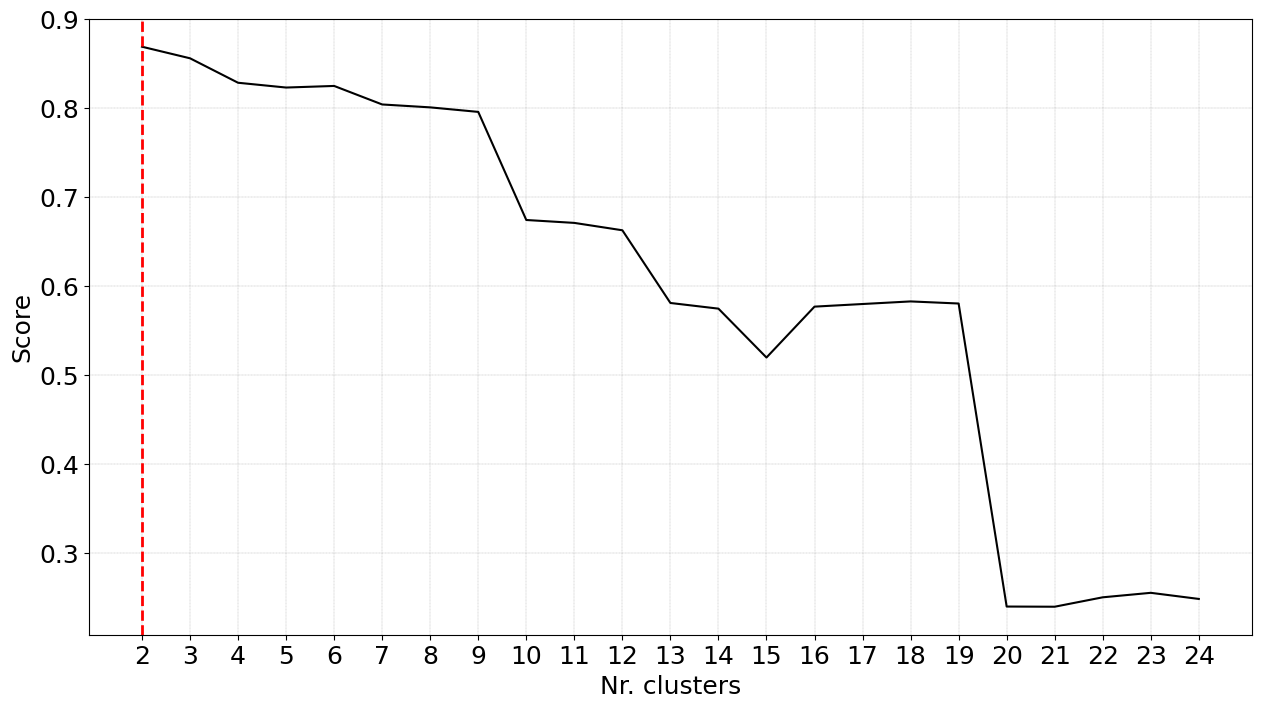

(<Figure size 1500x800 with 1 Axes>,
 <Axes: xlabel='Nr. clusters', ylabel='Score'>)

In [255]:
r_ce.plot()

In [256]:
r_results

{'evaluate': 'silhouette',
 'score':     cluster_threshold  clusters     score
 0                   2         2  0.868646
 1                   3         3  0.855647
 2                   4         4  0.828180
 3                   5         5  0.822803
 4                   6         6  0.824595
 5                   7         7  0.803794
 6                   8         8  0.800530
 7                   9         9  0.795448
 8                  10        10  0.674041
 9                  11        11  0.670779
 10                 12        12  0.662495
 11                 13        13  0.580846
 12                 14        14  0.574481
 13                 15        15  0.519587
 14                 16        16  0.576739
 15                 17        17  0.579680
 16                 18        18  0.582592
 17                 19        19  0.580242
 18                 20        20  0.239902
 19                 21        21  0.239706
 20                 22        22  0.250282
 21               

[clusteval] >INFO> Coordinates (x, y) are set based on the first two features.


[colourmap] >Add transparency to RGB colors (last column)
[scatterd]> Set alpha based on density because of the parameter: [opaque]


(<Figure size 2500x1500 with 1 Axes>, <Axes: xlabel='x-axis', ylabel='y-axis'>)

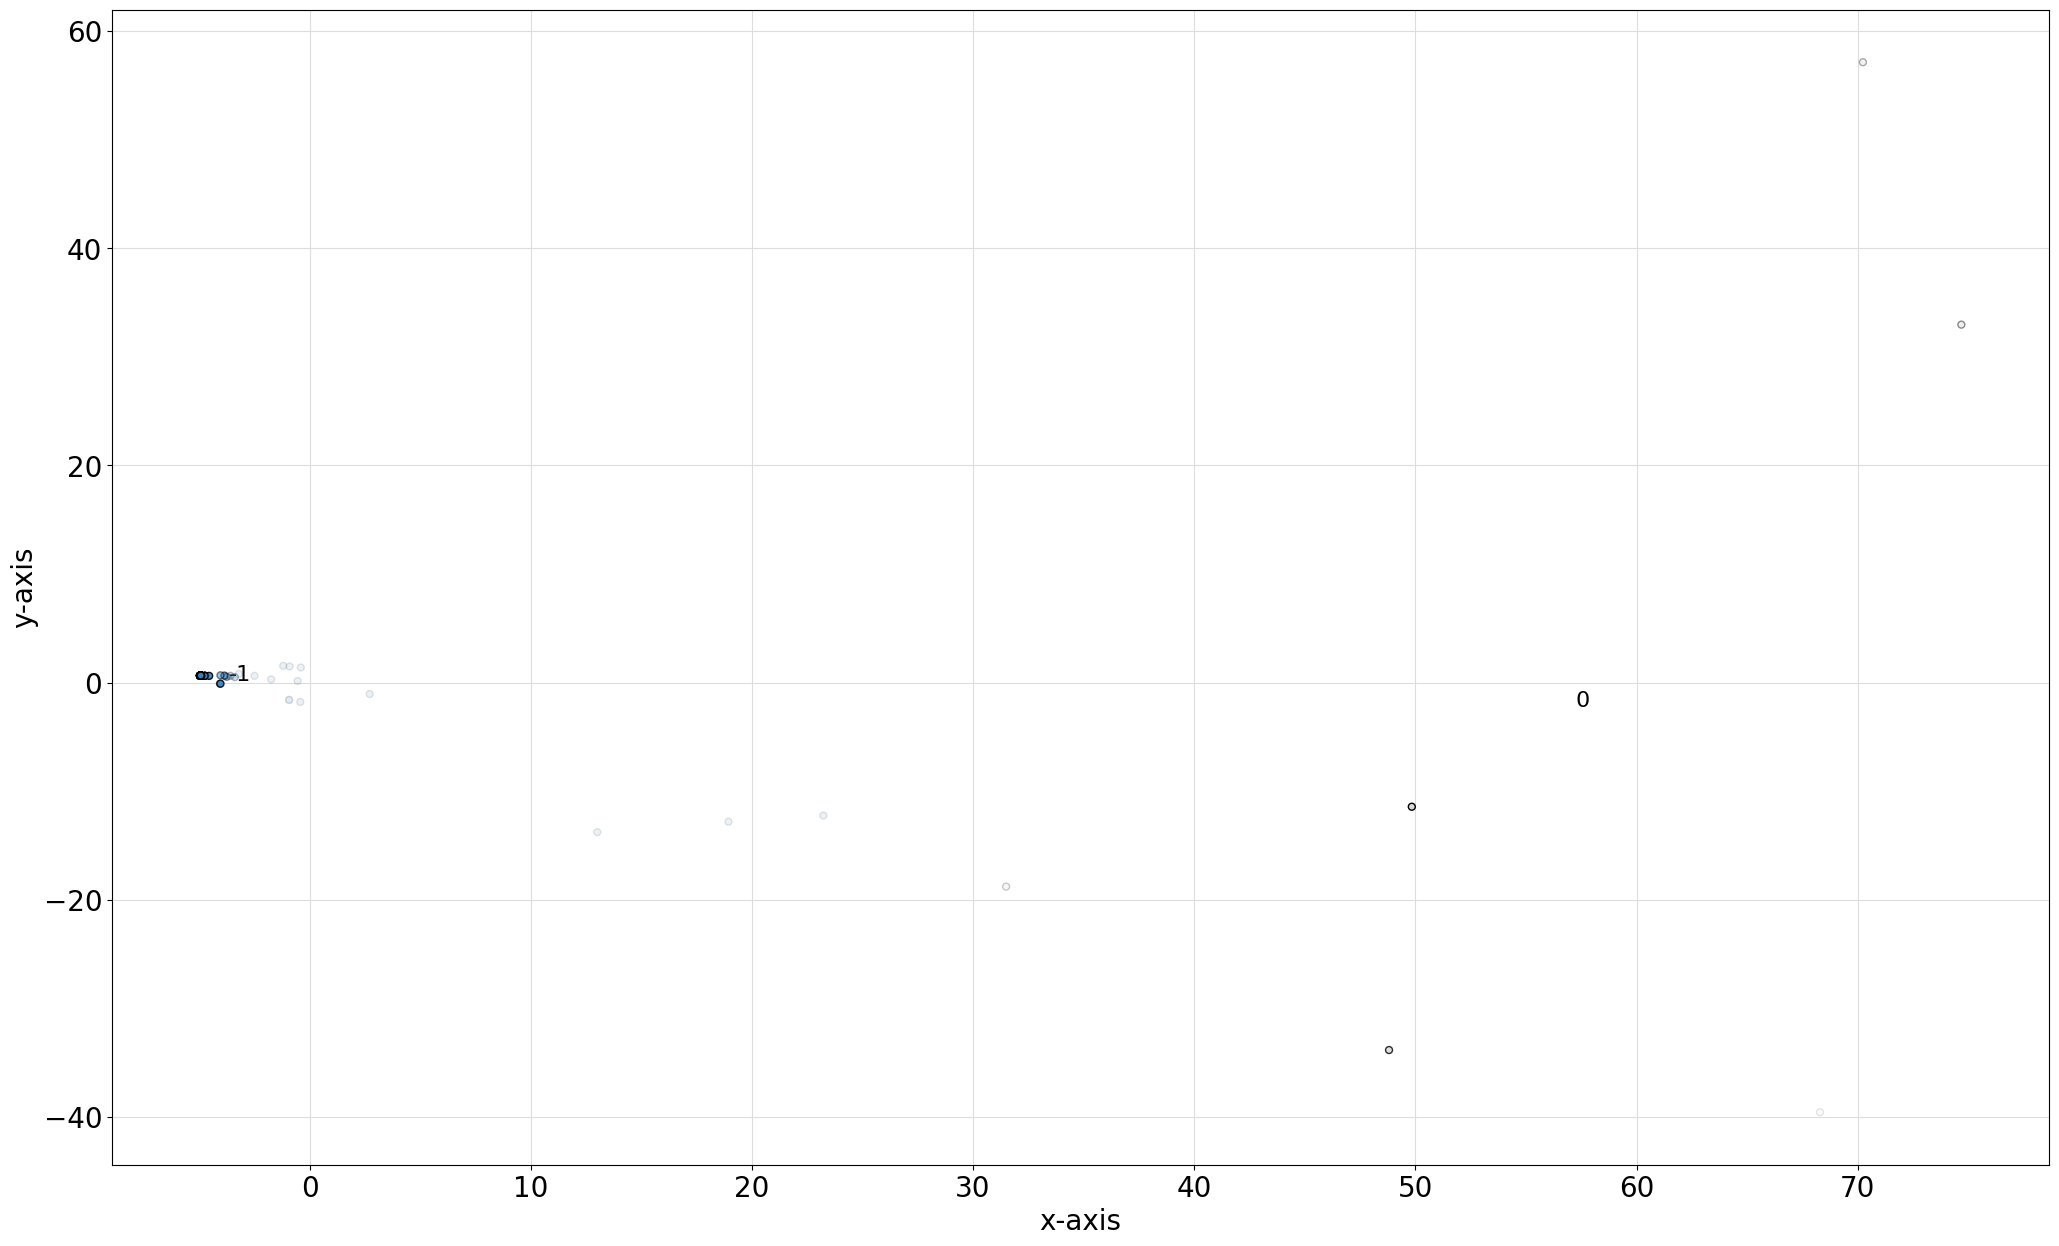

In [257]:
r_ce.scatter(r_proj)

# Care Homes

In [ ]:
52.62172504585236, -1.1101221724736599

In [ ]:
52.65883926928807, -1.1306349699289144

In [ ]:
52.65852658755537, -1.143915581515234

In [ ]:
52.61347597404073, -1.0955431473301578

In [ ]:
52.65476308038716, -1.1228256434410278

In [ ]:
52.651683698337976, -1.175175487618207

In [270]:
care_home_dict = {"lat" : [52.62172504585236, 52.65883926928807, 52.65852658755537, 52.61347597404073, 52.65476308038716, 52.651683698337976] , "lng" : [-1.1101221724736599, -1.1306349699289144, -1.143915581515234, -1.0955431473301578, -1.1228256434410278, -1.175175487618207 ]}

In [271]:
care_home_df = pd.DataFrame(care_home_dict)

In [272]:
care_home_df

,lat,lng
0,52.621725,-1.110122
1,52.658839,-1.130635
2,52.658527,-1.143916
3,52.613476,-1.095543
4,52.654763,-1.122826
5,52.651684,-1.175175


# K-means

In [183]:
mm_proj

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58
0,-0.902749,0.140175,0.314854,0.111860,0.107130,-0.052782,-0.005832,0.055218,-0.002036,0.055085,...,-0.006213,0.005713,0.000547,-0.004421,-0.006875,0.001734,0.001459,0.000652,-0.000361,0.001926
1,-0.850116,0.085408,0.284249,0.122834,0.116527,-0.073219,-0.040104,0.042556,0.006257,0.058059,...,-0.019364,-0.015813,-0.005746,-0.013614,0.008022,0.010592,0.001838,-0.002680,0.000126,0.000009
2,-0.902749,0.140175,0.314854,0.111860,0.107130,-0.052782,-0.005832,0.055218,-0.002036,0.055085,...,-0.006213,0.005713,0.000547,-0.004421,-0.006875,0.001734,0.001459,0.000652,-0.000361,0.001926
3,-0.866397,0.142910,0.282548,0.114561,0.100298,-0.073460,-0.011868,0.036638,-0.010178,0.039110,...,-0.020792,0.001660,-0.005991,-0.005756,-0.011274,0.004666,0.008492,0.008189,-0.001815,0.004878
4,-0.786480,0.066408,0.185304,0.016344,0.076144,0.029055,-0.093805,0.011775,0.005665,-0.002776,...,0.000594,-0.002343,-0.008401,-0.002932,-0.003328,0.011250,0.004603,0.003454,-0.001614,-0.000220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.750587,0.020261,0.090737,-0.245356,-0.077929,0.241617,-0.105373,-0.091233,-0.151117,-0.120083,...,0.001917,-0.002774,0.006168,0.002210,-0.004205,0.001900,-0.003023,-0.002657,-0.005874,-0.000109
96,-0.738336,0.029258,0.085431,-0.186191,-0.015970,0.219337,-0.149644,-0.067595,-0.061926,-0.127512,...,0.002974,0.001532,-0.001759,-0.007731,0.009956,-0.004169,-0.002522,-0.001332,-0.005168,-0.001977
97,-0.463158,0.006152,-0.083108,-0.248062,-0.033518,0.155584,0.131447,-0.041363,0.011399,-0.214527,...,0.019825,0.006544,-0.010738,0.017682,0.012470,-0.012224,-0.012195,0.004516,0.003359,0.004580
98,-0.890880,0.140678,0.221827,-0.082284,0.011236,0.093149,-0.042454,-0.022183,0.003925,0.005769,...,-0.011379,0.004090,0.008042,-0.009457,-0.002948,-0.001601,0.002438,-0.000081,-0.000480,0.000073


## Min-Max K-means

/home/mih_sud/.pyenv/versions/3.10.6/envs/Location-Analysis/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/mih_sud/.pyenv/versions/3.10.6/envs/Location-Analysis/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/mih_sud/.pyenv/versions/3.10.6/envs/Location-Analysis/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/mih_sud/.pyenv/versions/3.10.6/envs/Location-Analysis/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value 

Text(0.5, 0, 'k cluster number')

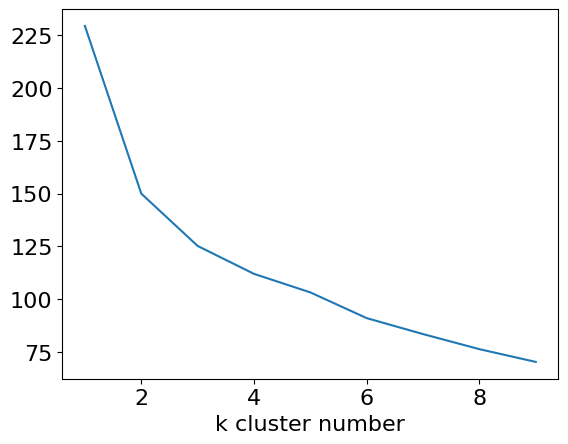

In [259]:
ks = range(1,10)
inertias = []
for k in ks:
    km_test = KMeans(n_clusters=k).fit(mm_proj)
    inertias.append(km_test.inertia_)

plt.plot(ks, inertias)
plt.xlabel('k cluster number')

In [260]:
mm_km = KMeans(n_clusters= 3)
mm_km.fit(mm_proj)

/home/mih_sud/.pyenv/versions/3.10.6/envs/Location-Analysis/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [261]:
mm_km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 0, 2,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       2, 0, 1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

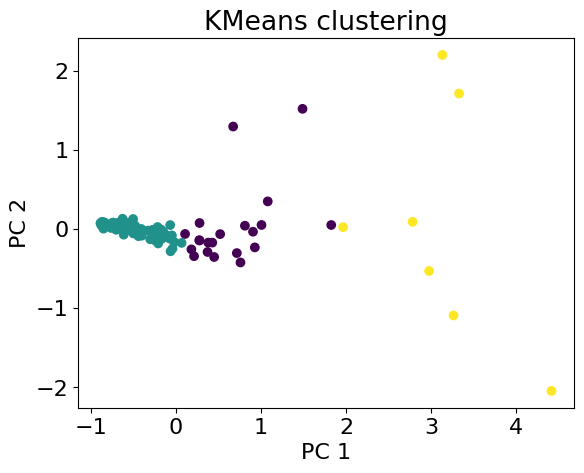

In [262]:
plt.scatter(mm_proj.iloc[:,0], mm_proj.iloc[:,1], c=mm_km.labels_)
plt.title('KMeans clustering'); plt.xlabel('PC 1'); plt.ylabel('PC 2');

In [ ]:
care

/tmp/ipykernel_12717/3682862337.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x = care_home_df["lat"], y = care_home_df["lng"], palette = "black")


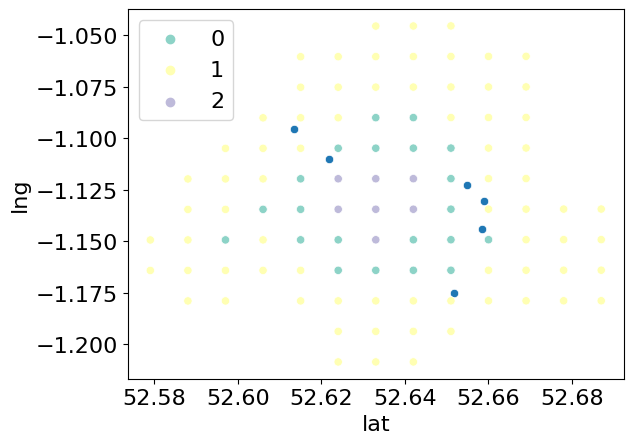

In [278]:
sns.scatterplot(x = care_home_df["lat"], y = care_home_df["lng"], palette = "black")
sns.scatterplot(x=leicester_golden_df['lat'], y=leicester_golden_df['lng'], hue=mm_km.labels_, palette='Set3')

plt.show()

## Robust K-Means

In [264]:
r_km = KMeans(n_clusters= 3)
r_km.fit(r_proj)

/home/mih_sud/.pyenv/versions/3.10.6/envs/Location-Analysis/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [265]:
r_km.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

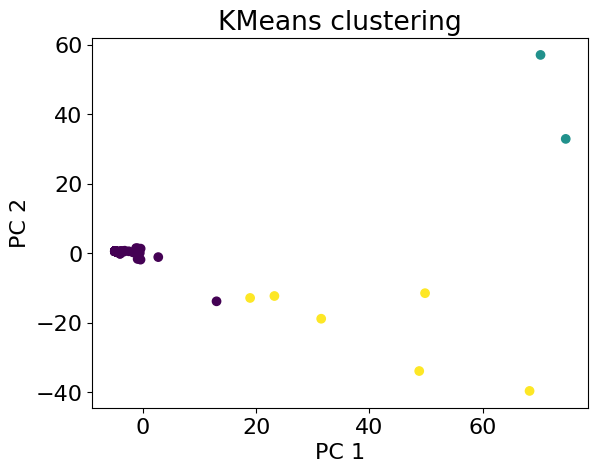

In [266]:
plt.scatter(r_proj.iloc[:,0], r_proj.iloc[:,1], c=r_km.labels_)
plt.title('KMeans clustering'); plt.xlabel('PC 1'); plt.ylabel('PC 2');

<Axes: xlabel='lng', ylabel='lat'>

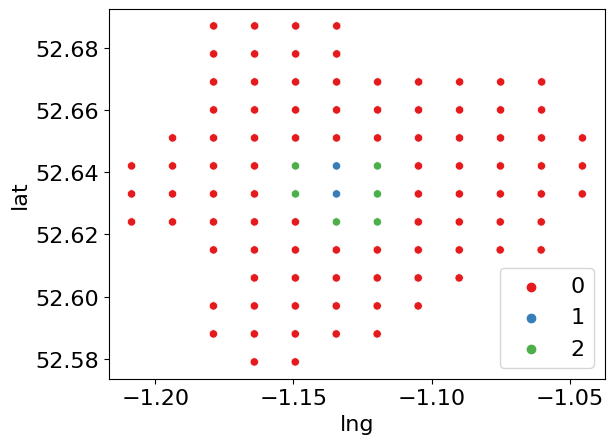

In [269]:
sns.scatterplot(x=leicester_golden_df['lng'], y=leicester_golden_df['lat'], hue= r_km.labels_, palette= "Set1" )

In [268]:
sns.color_palette("husl", 8)


[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]